# Exploratory Data Analysis (EDA)
**Team**: Renaissance Technologies  
**Purpose**: Analyze loan default patterns and prepare for predictive modeling


## 1. Setup & Data Loading

In [44]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [45]:
# Load dataset
df = pd.read_csv('main_dataset.csv')

print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")
print(f"\nFirst few rows:")
df.head()

Dataset loaded: 89,999 rows, 64 columns

First few rows:


,customer_id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,...,total_debt_amount,monthly_free_cash_flow,revolving_balance_missing,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,...,159913.1,3819.230,0,OH,4.8,56000,1380,91,73,451
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,...,189932.2,977.260,0,PA,4.4,61000,1510,92,87,537
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,...,31614.6,1203.120,0,VA,3.9,74000,1920,125,103,679
3,10003,621493,7,5,2010,Email,REF0000,ACT-1,-0.709779,4,...,17520.0,2093.437,0,CA,5.8,75000,1690,158,121,719
4,10004,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,...,31453.6,1466.420,0,WA,5.8,78000,1700,152,127,933


## 2. Target Variable Analysis

In [46]:
# 2.1. Class Distribution & Imbalance Check
print("Target Variable: default")

# Class distribution
default_counts = df['default'].value_counts().sort_index()
default_pct = (default_counts / len(df) * 100).round(2)

print(f"\nClass Distribution:")
for val, count in default_counts.items():
    print(f"  Class {val}: {count:,} ({default_pct[val]:.2f}%)")

# imbalance ratio
if len(default_counts) == 2:
    imbalance_ratio = default_counts.max() / default_counts.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
    
    baseline_accuracy = (default_counts.max() / len(df) * 100)
    print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")
    print(f"(if we always predict class {default_counts.idxmax()})")

# Default rate
default_rate = (df['default'].sum() / len(df) * 100)
print(f"\nOverall Default Rate: {default_rate:.2f}%")

Target Variable: default

Class Distribution:
  Class 0: 85,405 (94.90%)
  Class 1: 4,594 (5.10%)

Imbalance Ratio: 18.59:1
Baseline Accuracy: 94.90%
(if we always predict class 0)

Overall Default Rate: 5.10%


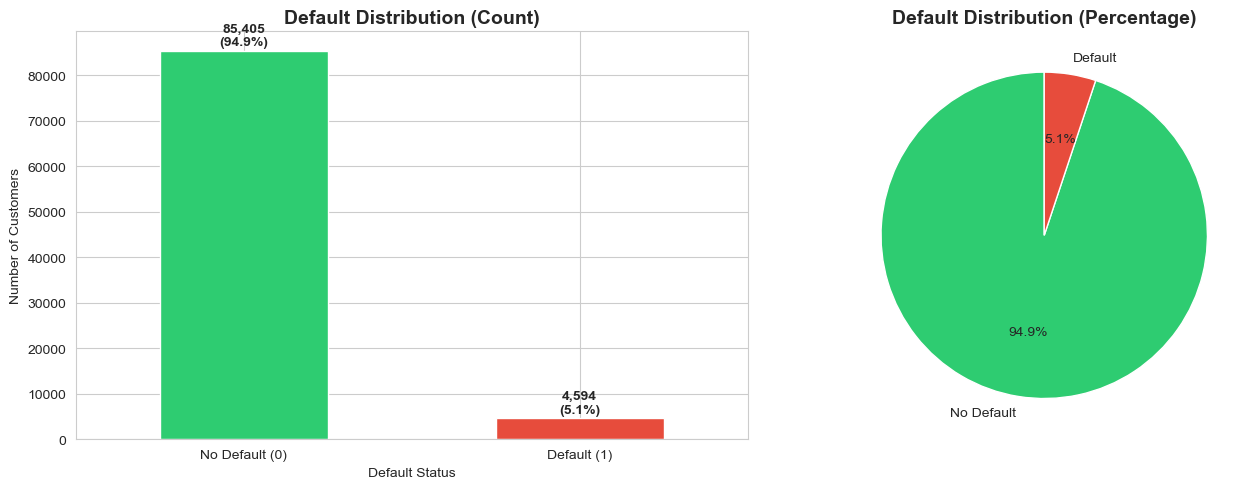

In [47]:
# 2.2. Visualize Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axes[0]
default_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Default Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Default Status')
ax1.set_ylabel('Number of Customers')
ax1.set_xticklabels(['No Default (0)', 'Default (1)'], rotation=0)

for i, v in enumerate(default_counts):
    ax1.text(i, v + 500, f'{v:,}\n({default_pct.iloc[i]}%)', 
             ha='center', va='bottom', fontweight='bold')

ax2 = axes[1]
colors = ['#2ecc71', '#e74c3c']
ax2.pie(default_counts, labels=['No Default', 'Default'], autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Default Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [48]:
# 2.3. Default Rate by Segments
# Analyze default rates across different customer segments

def default_rate_by_segment(column):
    if column not in df.columns:
        print(f"Column '{column}' not found")
        return None
    
    segment_analysis = df.groupby(column)['default'].agg([
        ('total', 'count'),
        ('defaults', 'sum'),
        ('default_rate', 'mean')
    ]).round(4)
    
    segment_analysis['default_rate'] = (segment_analysis['default_rate'] * 100).round(2)
    segment_analysis = segment_analysis.sort_values('default_rate', ascending=False)
    
    return segment_analysis

print("Default Rate by Loan Type")
print("-"*50)
loan_analysis = default_rate_by_segment('loan_type')
if loan_analysis is not None:
    print(loan_analysis)
    print()

Default Rate by Loan Type
--------------------------------------------------
             total  defaults  default_rate
loan_type                                 
mortgage     31429      2090          6.65
personal     36232      1826          5.04
credit_card  22338       678          3.04



In [49]:
# Default rate by employment type
print("Default Rate by Employment Type")
print("-"*50)
employment_analysis = default_rate_by_segment('employment_type')
if employment_analysis is not None:
    print(employment_analysis)
    print()

# Default rate by education
print("Default Rate by Education Level")
print("-"*50)
education_analysis = default_rate_by_segment('education')
if education_analysis is not None:
    print(education_analysis)
    print()

Default Rate by Employment Type
--------------------------------------------------
                 total  defaults  default_rate
employment_type                               
contract          4539       250          5.51
self_employed    13436       709          5.28
full_time        63017      3218          5.11
part_time         9007       417          4.63

Default Rate by Education Level
--------------------------------------------------
              total  defaults  default_rate
education                                  
high_school   18794      1614          8.59
some_college  21543      1303          6.05
bachelor      26326      1068          4.06
graduate      15585       410          2.63
advanced       7751       199          2.57



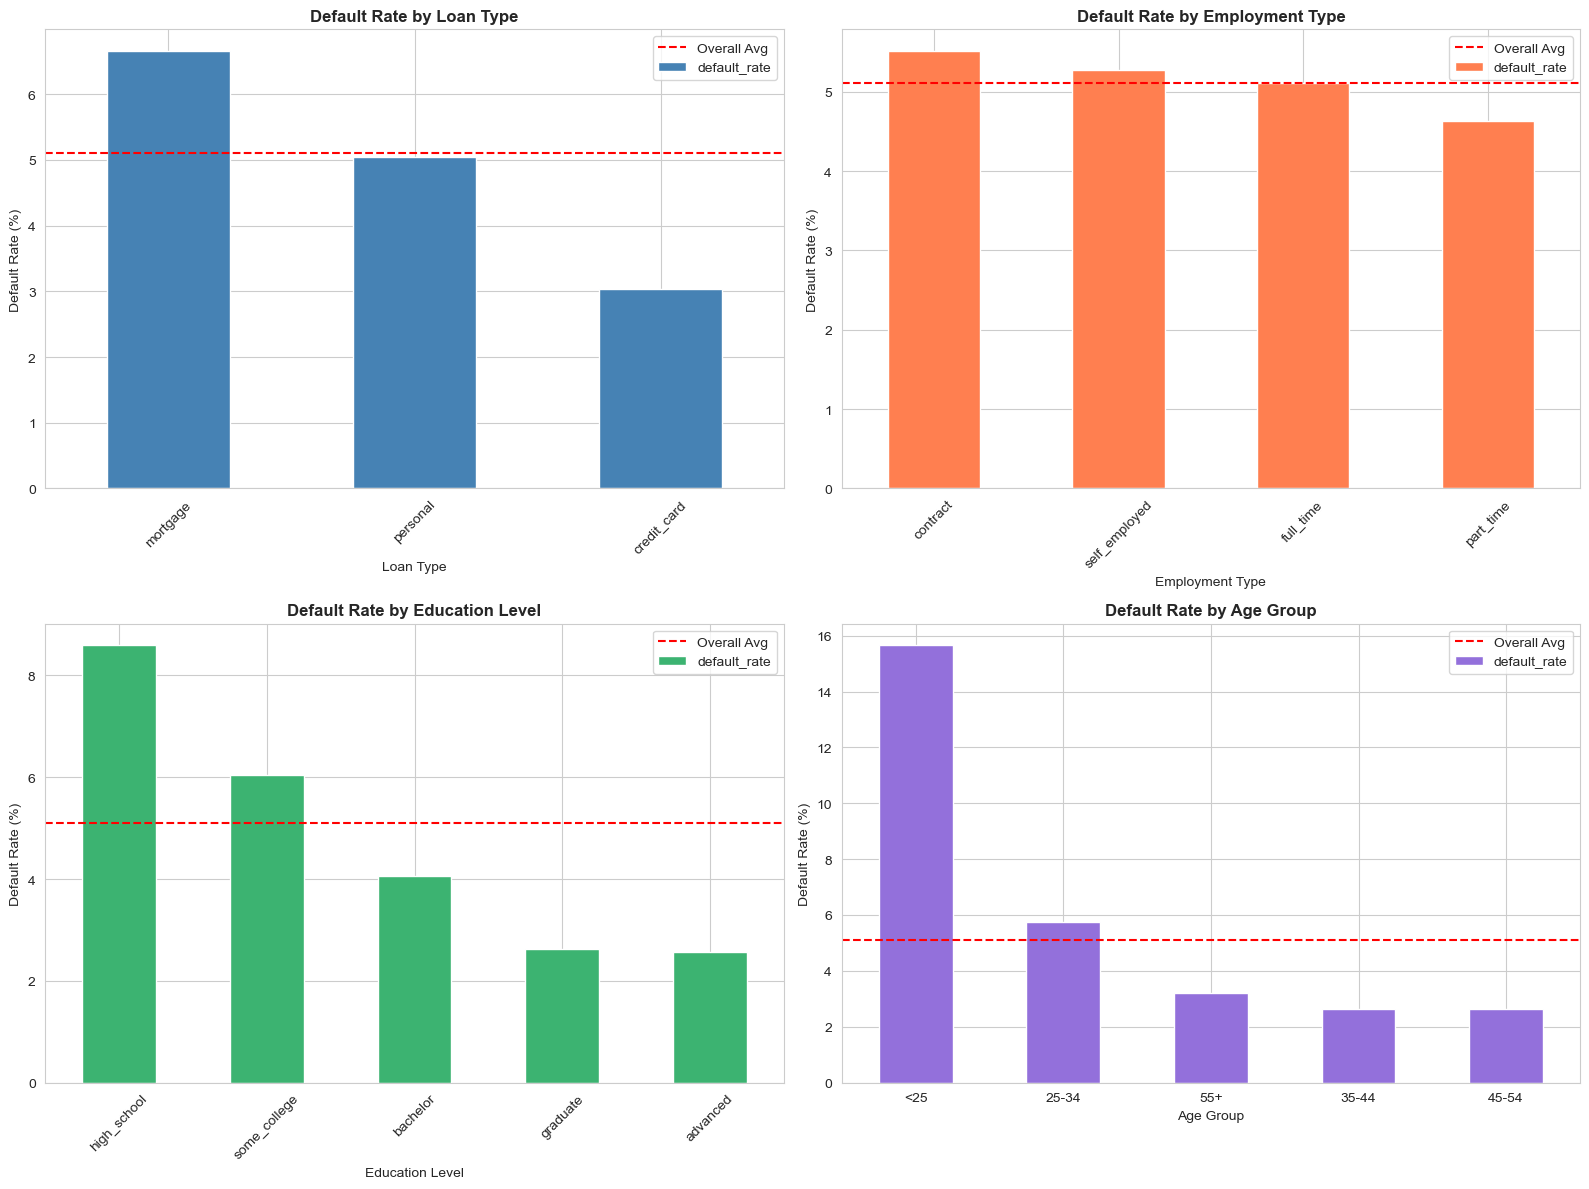

In [50]:
# 2.4. Visualize Default Rates by Segments
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

if loan_analysis is not None and len(loan_analysis) > 0:
    ax1 = axes[0, 0]
    loan_analysis['default_rate'].plot(kind='bar', ax=ax1, color='steelblue')
    ax1.set_title('Default Rate by Loan Type', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Loan Type')
    ax1.set_ylabel('Default Rate (%)')
    ax1.axhline(y=default_rate, color='red', linestyle='--', label='Overall Avg')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)

if employment_analysis is not None and len(employment_analysis) > 0:
    ax2 = axes[0, 1]
    employment_analysis['default_rate'].plot(kind='bar', ax=ax2, color='coral')
    ax2.set_title('Default Rate by Employment Type', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Employment Type')
    ax2.set_ylabel('Default Rate (%)')
    ax2.axhline(y=default_rate, color='red', linestyle='--', label='Overall Avg')
    ax2.legend()
    ax2.tick_params(axis='x', rotation=45)

if education_analysis is not None and len(education_analysis) > 0:
    ax3 = axes[1, 0]
    education_analysis['default_rate'].plot(kind='bar', ax=ax3, color='mediumseagreen')
    ax3.set_title('Default Rate by Education Level', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Education Level')
    ax3.set_ylabel('Default Rate (%)')
    ax3.axhline(y=default_rate, color='red', linestyle='--', label='Overall Avg')
    ax3.legend()
    ax3.tick_params(axis='x', rotation=45)

ax4 = axes[1, 1]
age_bins = [0, 25, 35, 45, 55, 100]
age_labels = ['<25', '25-34', '35-44', '45-54', '55+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_analysis = default_rate_by_segment('age_group')
if age_analysis is not None:
    age_analysis['default_rate'].plot(kind='bar', ax=ax4, color='mediumpurple')
    ax4.set_title('Default Rate by Age Group', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Age Group')
    ax4.set_ylabel('Default Rate (%)')
    ax4.axhline(y=default_rate, color='red', linestyle='--', label='Overall Avg')
    ax4.legend()
    ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## 3. Feature Analysis

In [51]:
# 3.1. Feature Type Classification
print("Feature Type Classification")

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

exclude_cols = ['default', 'customer_id', 'application_id', 'age_group']
numeric_features = [col for col in numeric_features if col not in exclude_cols]
categorical_features = [col for col in categorical_features if col not in exclude_cols]

print(f"\nNumeric Features ({len(numeric_features)}):")
for i, col in enumerate(numeric_features, 1):
    print(f"  {i}. {col}")

print(f"\nCategorical Features ({len(categorical_features)}):")
for i, col in enumerate(categorical_features, 1):
    print(f"  {i}. {col}")

#target variable is default, indentifiers are customer id and application id 

Feature Type Classification

Numeric Features (50):
  1. application_hour
  2. application_day_of_week
  3. account_open_year
  4. random_noise_1
  5. num_login_sessions
  6. num_customer_service_calls
  7. has_mobile_app
  8. paperless_billing
  9. age
  10. annual_income
  11. employment_length
  12. num_dependents
  13. employment_length_missing
  14. credit_score
  15. num_credit_accounts
  16. oldest_credit_line_age
  17. oldest_account_age_months
  18. total_credit_limit
  19. num_delinquencies_2yrs
  20. num_inquiries_6mo
  21. recent_inquiry_count
  22. num_public_records
  23. num_collections
  24. account_diversity_index
  25. loan_amount
  26. loan_term
  27. interest_rate
  28. loan_to_value_ratio
  29. loan_officer_id
  30. monthly_income
  31. existing_monthly_debt
  32. monthly_payment
  33. debt_to_income_ratio
  34. debt_service_ratio
  35. payment_to_income_ratio
  36. credit_utilization
  37. credit_usage_amount
  38. available_credit
  39. total_monthly_debt_payment

In [52]:
# 3.2. Numeric Features Summary Statistics
print("Numeric Features Summary Statistics")

numeric_summary = df[numeric_features].describe().T
numeric_summary['missing'] = df[numeric_features].isnull().sum()
numeric_summary['missing_pct'] = (numeric_summary['missing'] / len(df) * 100).round(2)

cols_order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing', 'missing_pct']
numeric_summary = numeric_summary[[col for col in cols_order if col in numeric_summary.columns]]


numeric_summary


Numeric Features Summary Statistics


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
application_hour,89999.0,11.475539,6.901162,0.000000,6.000000,11.000000,17.000000,23.000000,0,0.0
application_day_of_week,89999.0,2.993755,2.005926,0.000000,1.000000,3.000000,5.000000,6.000000,0,0.0
account_open_year,89999.0,2016.497517,4.020588,2010.000000,2013.000000,2017.000000,2020.000000,2023.000000,0,0.0
random_noise_1,89999.0,0.000091,0.997134,-4.091319,-0.671945,0.003168,0.668945,5.236351,0,0.0
num_login_sessions,89999.0,8.814387,3.823459,1.000000,6.000000,8.000000,11.000000,34.000000,0,0.0
num_customer_service_calls,89999.0,1.994544,1.413004,0.000000,1.000000,2.000000,3.000000,11.000000,0,0.0
has_mobile_app,89999.0,0.713308,0.452219,0.000000,0.000000,1.000000,1.000000,1.000000,0,0.0
paperless_billing,89999.0,0.620262,0.485324,0.000000,0.000000,1.000000,1.000000,1.000000,0,0.0
age,89999.0,38.715041,10.805176,18.000000,31.000000,38.000000,46.000000,74.000000,0,0.0
annual_income,89999.0,47586.732075,26691.159740,20000.000000,28100.000000,41100.000000,59300.000000,487200.000000,0,0.0


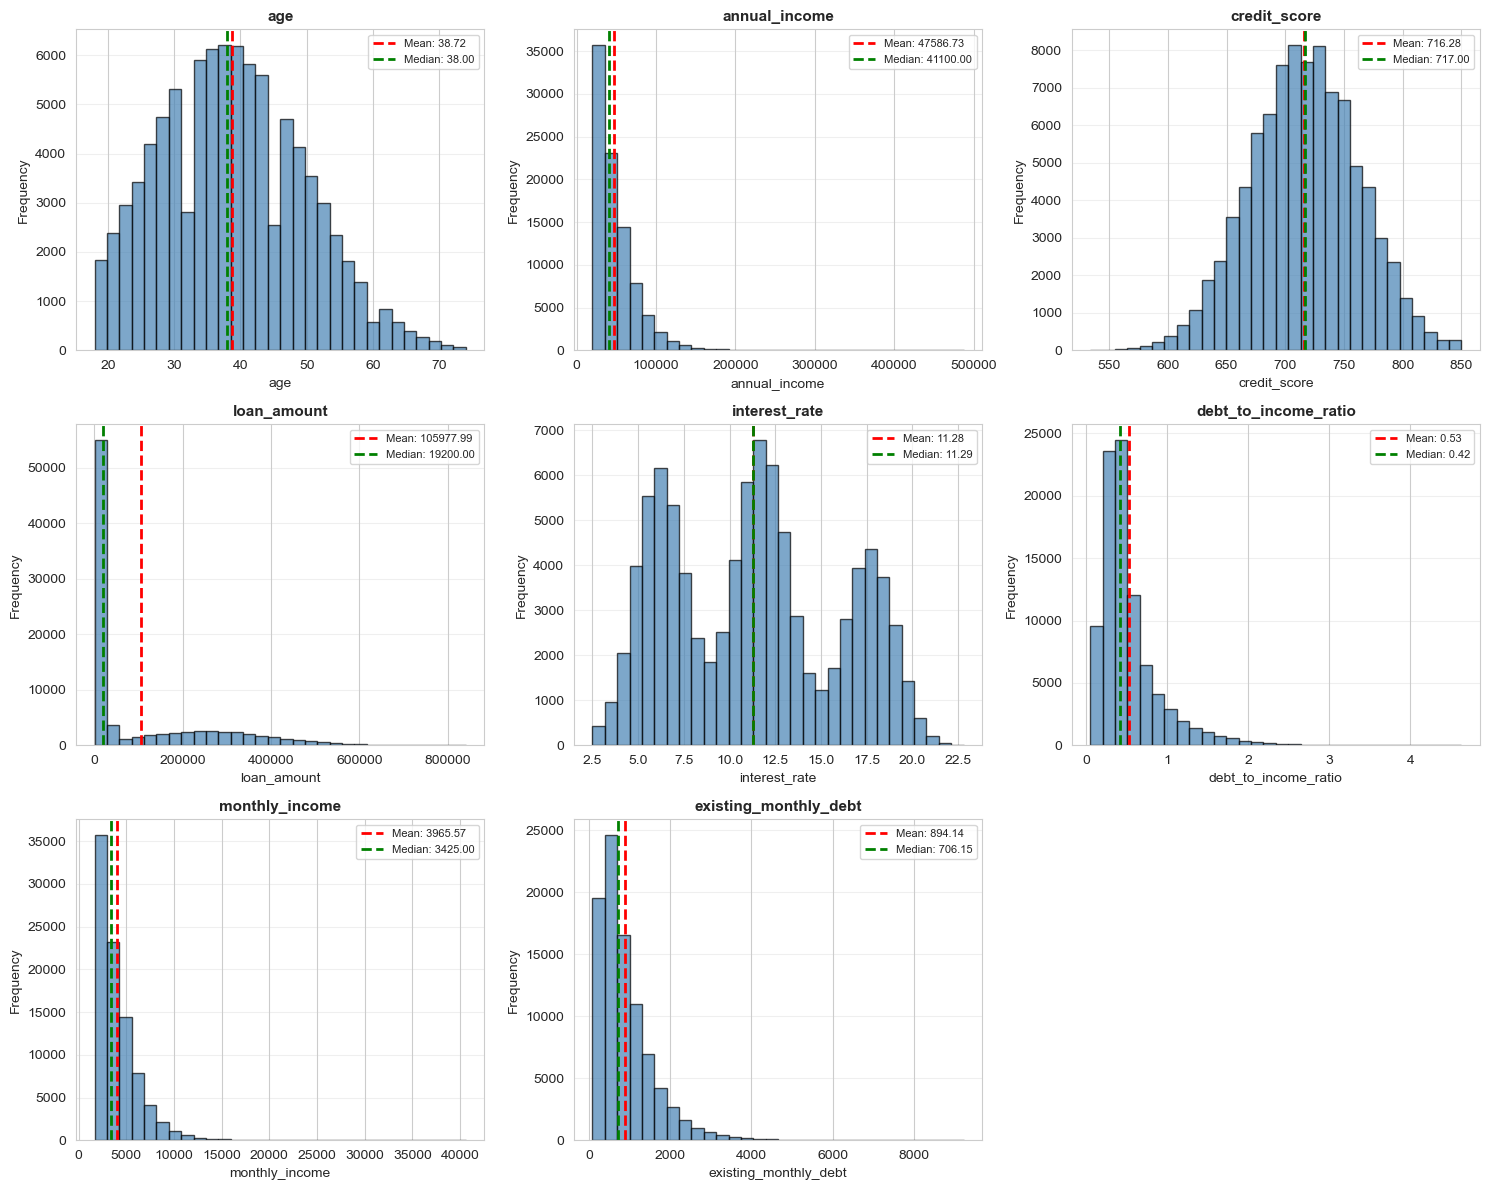

In [53]:
# 3.3. Numeric Features Distribution
key_numeric_features = [
    'age', 'annual_income', 'credit_score', 'loan_amount', 
    'interest_rate', 'debt_to_income_ratio', 'credit_utilization_ratio',
    'monthly_income', 'existing_monthly_debt'
]

key_numeric_features = [f for f in key_numeric_features if f in numeric_features]

n_features = len(key_numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(key_numeric_features):
    ax = axes[idx]
    
    df[feature].hist(bins=30, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



In [54]:
# 3.4. Categorical Features Analysis
print("Categorical Features Analysis")

for feature in categorical_features:
    print(f"\n{feature}:")
    print("-" * 40)
    
    value_counts = df[feature].value_counts()
    value_pct = (value_counts / len(df) * 100).round(2)
    
    summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_pct
    })
    
    print(summary)
    print(f"Unique values: {df[feature].nunique()}")
    print(f"Missing values: {df[feature].isnull().sum()}")

Categorical Features Analysis

preferred_contact:
----------------------------------------
                   Count  Percentage
preferred_contact                   
Email              54094       60.11
Phone              27023       30.03
Mail                8882        9.87
Unique values: 3
Missing values: 0

referral_code:
----------------------------------------
               Count  Percentage
referral_code                   
REF0000        71987       79.99
REF4315           13        0.01
REF9450            9        0.01
REF4048            9        0.01
REF6347            8        0.01
...              ...         ...
REF1093            1        0.00
REF7470            1        0.00
REF4067            1        0.00
REF6923            1        0.00
REF3820            1        0.00

[7805 rows x 2 columns]
Unique values: 7805
Missing values: 0

account_status_code:
----------------------------------------
                     Count  Percentage
account_status_code                   

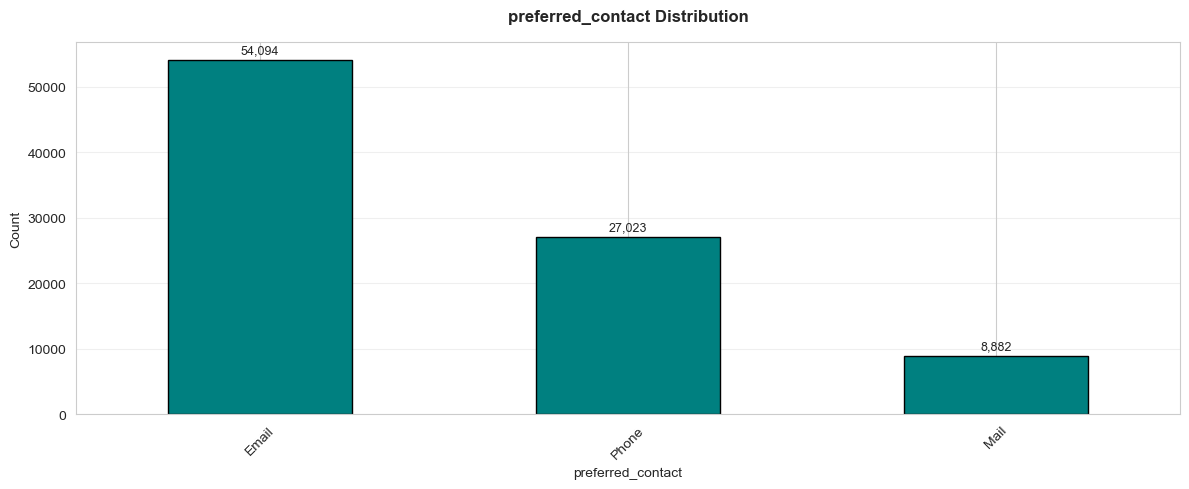


referral_code: Showing top 20 out of 7805 categories


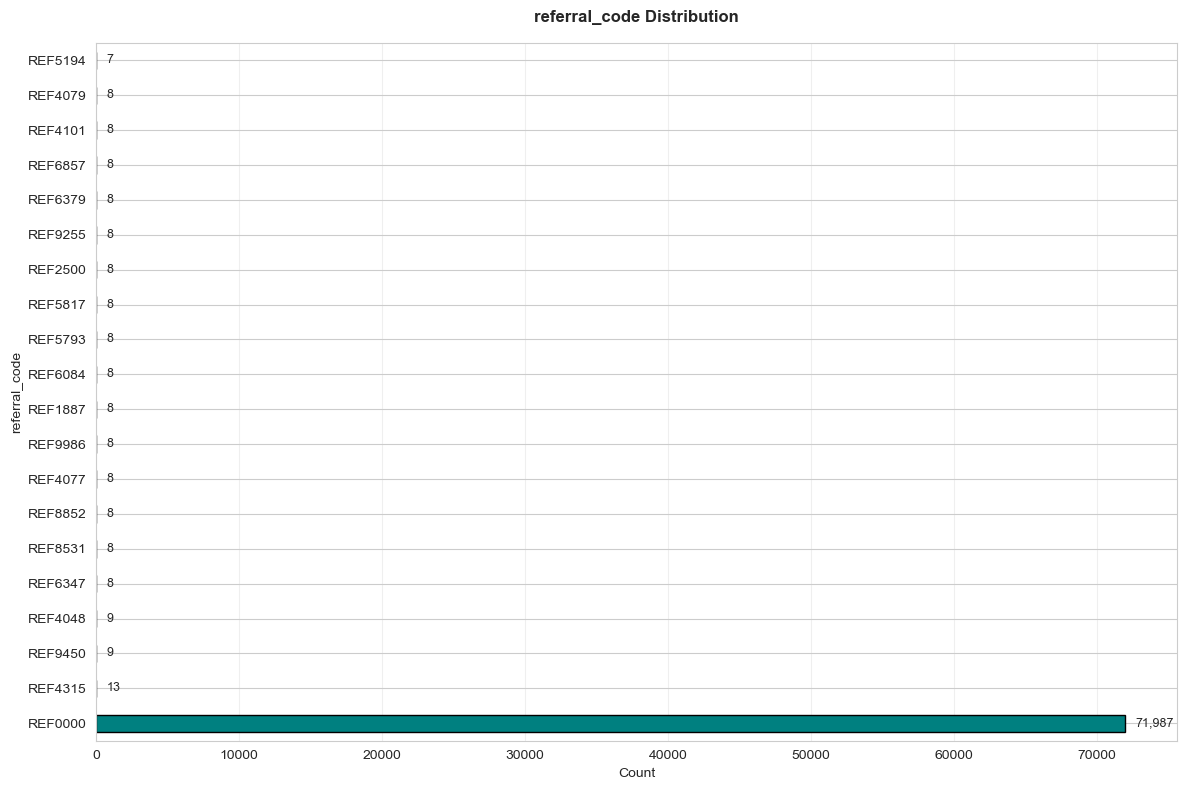

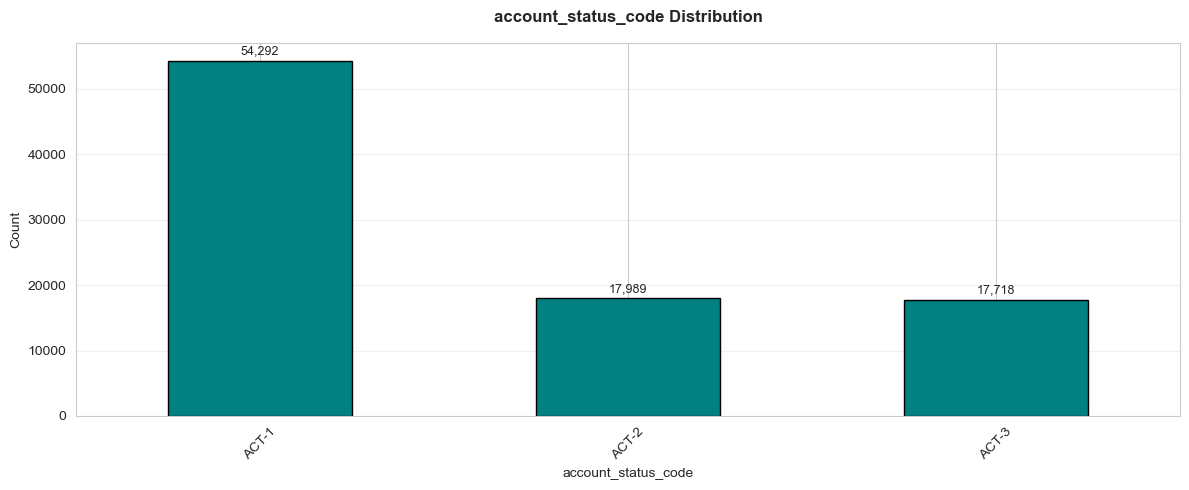

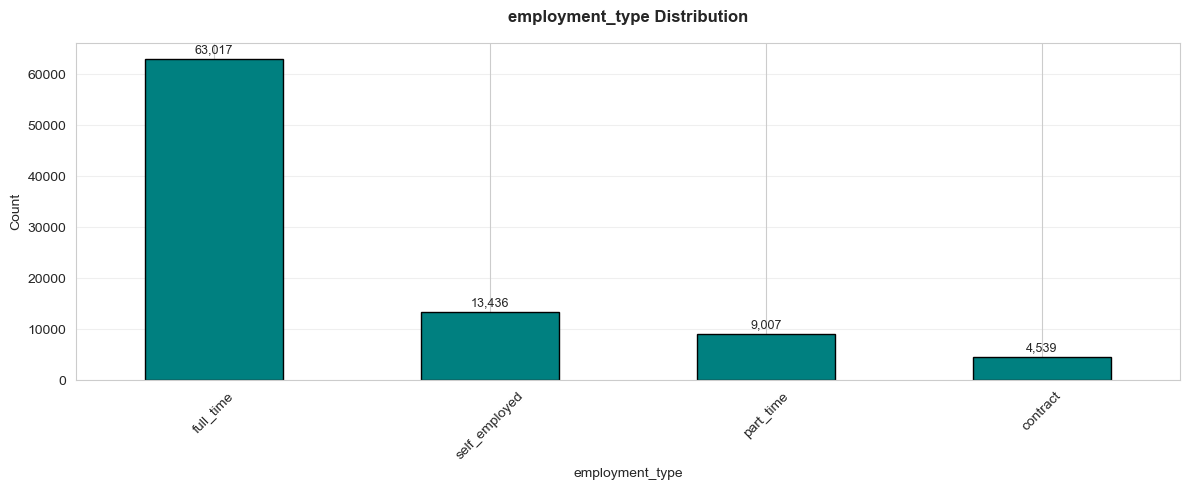

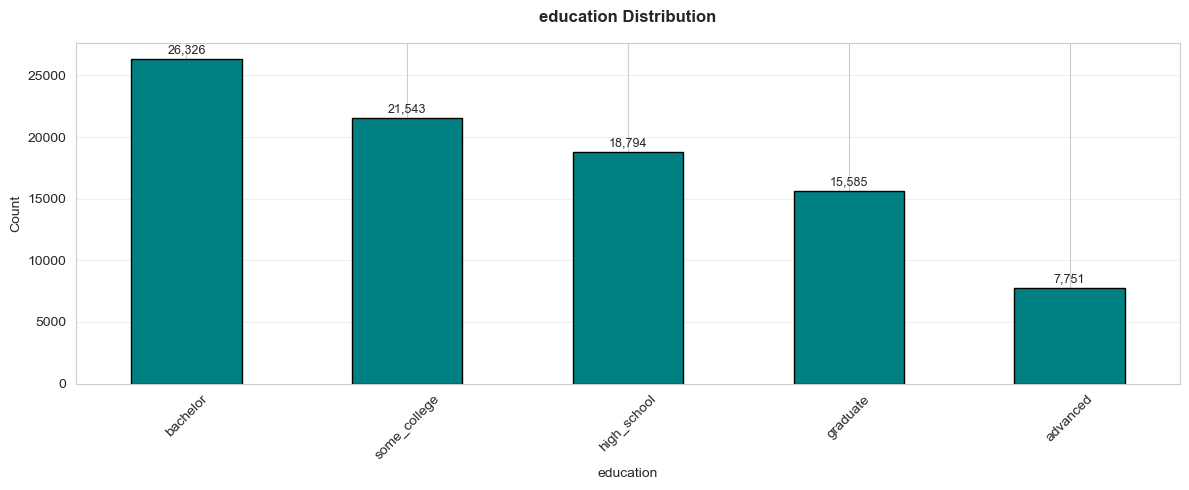

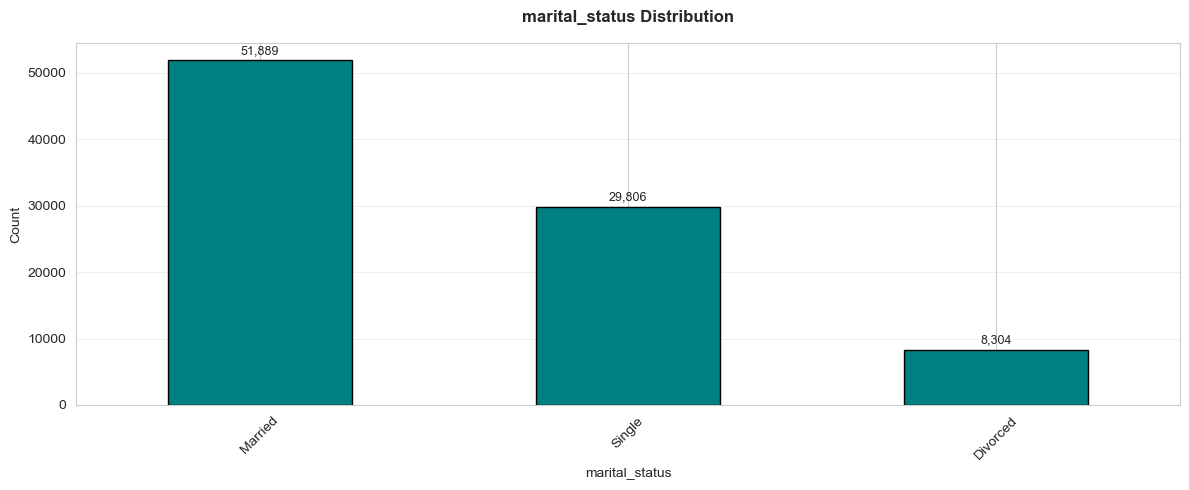

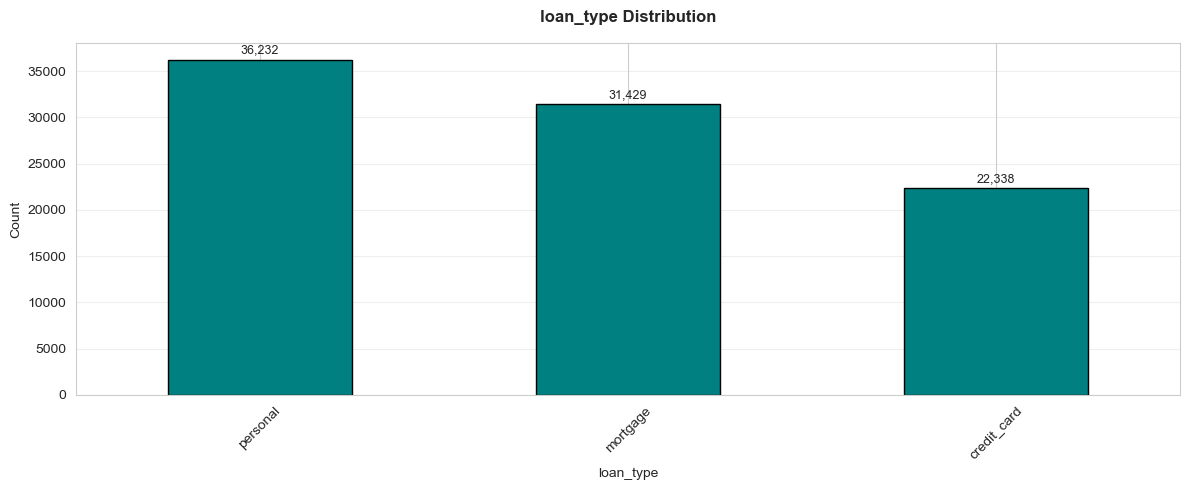

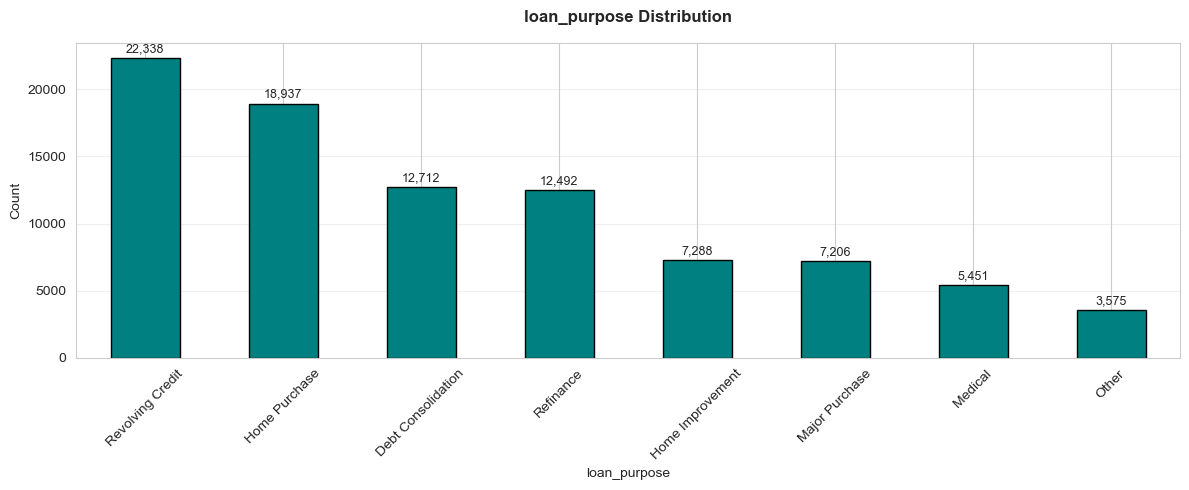

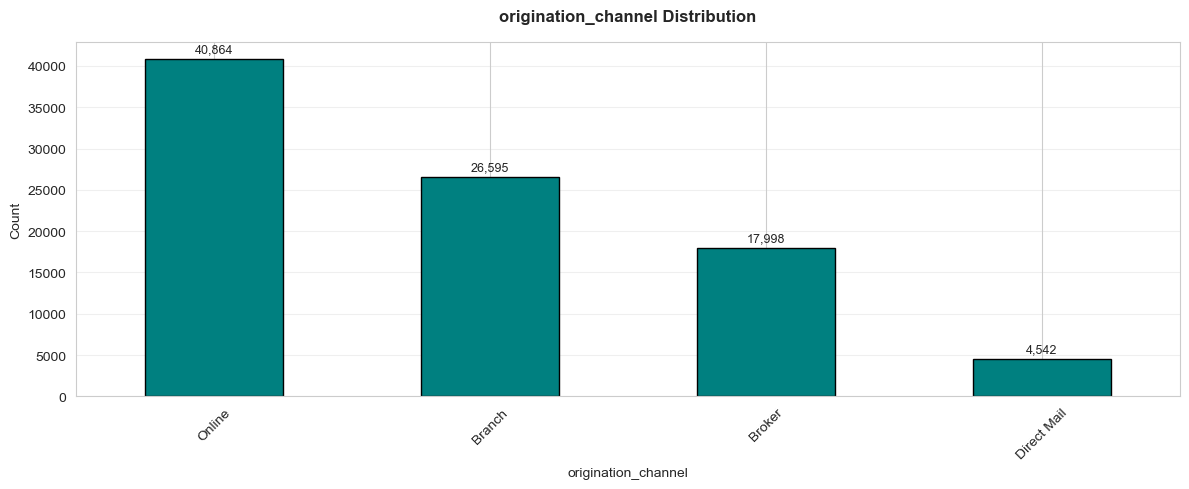

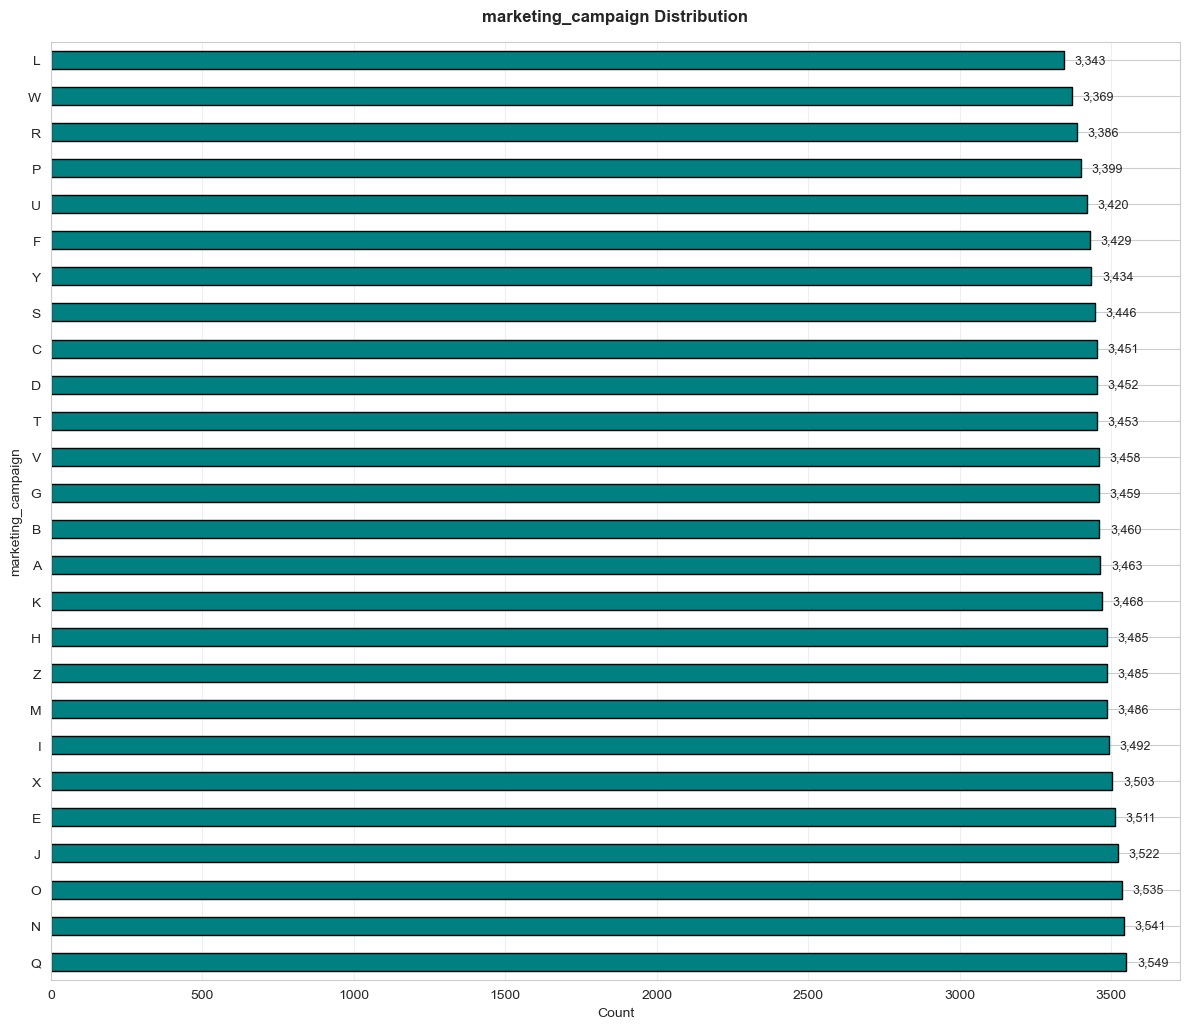

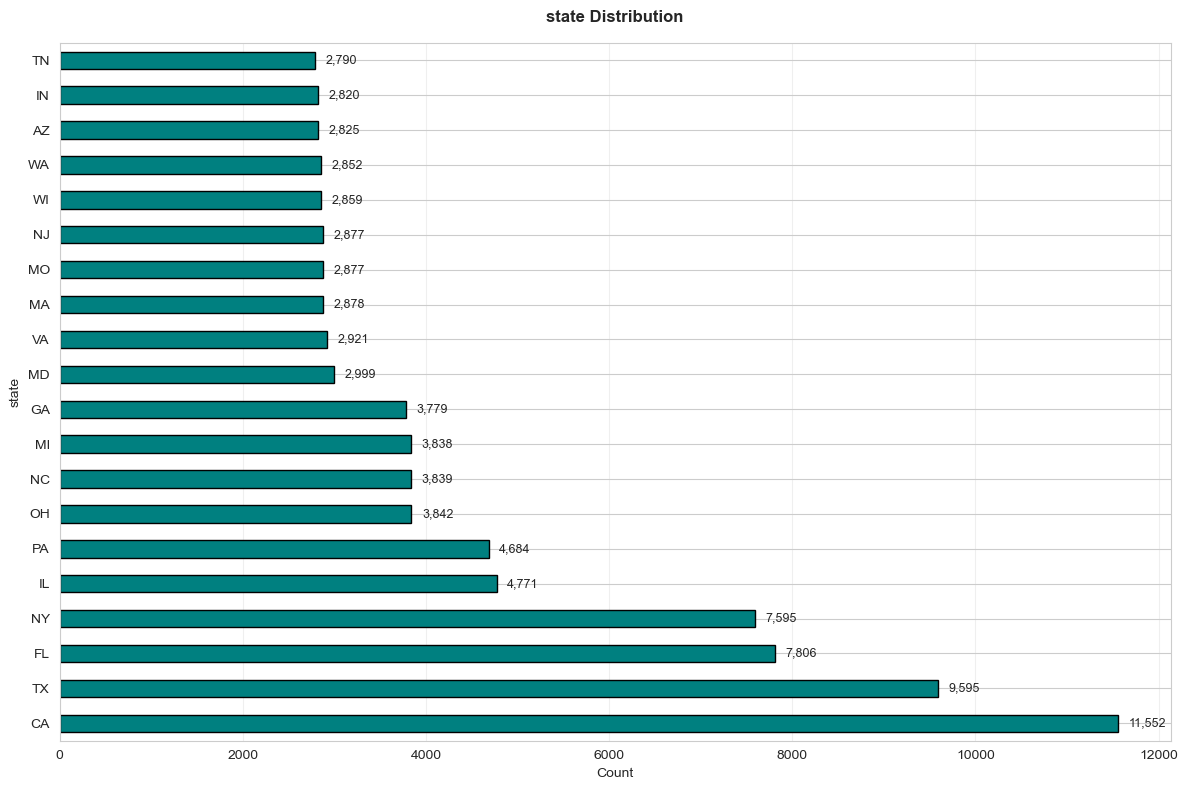


Visualized 11 categorical features


In [55]:
# 3.5. Categorical Features Visualization
# Plot each feature separately for better readability

if len(categorical_features) > 0:
    for feature in categorical_features:
        value_counts = df[feature].value_counts()
        n_categories = len(value_counts)
        
        # For features with too many categories, show only top 20
        if n_categories > 50:
            print(f"\n{feature}: Showing top 20 out of {n_categories} categories")
            value_counts = value_counts.head(20)
            n_categories = 20
        
        # Adjust figure size with a reasonable cap (max 25 inches)
        fig_height = min(25, max(5, n_categories * 0.4))
        fig_width = 12
        
        fig, ax = plt.subplots(figsize=(fig_width, fig_height))
        
        # Use horizontal bar for features with many categories
        if n_categories > 8:
            value_counts.plot(kind='barh', ax=ax, color='teal', edgecolor='black')
            ax.set_xlabel('Count')
            ax.set_ylabel(feature)
            
            # Add count labels
            for i, v in enumerate(value_counts):
                ax.text(v + max(value_counts)*0.01, i, f'{v:,}', 
                       va='center', fontsize=9)
        else:
            value_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
            
            # Add count labels on top of bars
            for i, v in enumerate(value_counts):
                ax.text(i, v + max(value_counts)*0.01, f'{v:,}', 
                       ha='center', va='bottom', fontsize=9)
        
        ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold', pad=15)
        ax.grid(axis='x' if n_categories > 8 else 'y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    print(f"\nVisualized {len(categorical_features)} categorical features")
else:
    print("No categorical features to visualize")

## 4. Correlation Analysis

In [56]:
# 4.1. Calculate Correlation Matrix
print("Correlation Analysis")
print("="*60)

correlation_features = [f for f in numeric_features if df[f].notna().sum() > 0]

correlation_matrix = df[correlation_features + ['default']].corr()

print(f"\nCalculated correlations for {len(correlation_features)} numeric features")
print(f"Dataset size: {len(df):,} rows")

correlation_matrix.head()

Correlation Analysis

Calculated correlations for 50 numeric features
Dataset size: 89,999 rows


,application_hour,application_day_of_week,account_open_year,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,age,annual_income,...,total_debt_amount,monthly_free_cash_flow,revolving_balance_missing,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code,default
application_hour,1.000000,0.000212,0.003347,-0.000089,-0.001126,-0.004360,0.003959,0.007398,-0.000471,0.004081,...,-0.002155,0.005756,-0.004615,0.006192,0.001486,-0.001041,0.000898,0.001418,0.002515,0.000544
application_day_of_week,0.000212,1.000000,0.000438,0.001051,-0.002986,0.002097,-0.002353,-0.000267,-0.000866,0.002391,...,-0.002794,0.004196,-0.000921,-0.003813,0.002811,0.002435,0.005319,0.003795,0.003261,-0.003733
account_open_year,0.003347,0.000438,1.000000,0.000225,-0.000765,0.002999,-0.006814,-0.000819,0.002084,0.004588,...,0.000551,0.003096,-0.001420,-0.001609,0.000382,-0.000408,0.002803,0.003712,0.001811,-0.000058
random_noise_1,-0.000089,0.001051,0.000225,1.000000,0.002247,0.002603,-0.002162,-0.004017,-0.001199,-0.003856,...,0.000196,-0.003333,0.003405,0.000305,-0.001462,-0.003952,0.000679,-0.000633,0.001591,0.008562
num_login_sessions,-0.001126,-0.002986,-0.000765,0.002247,1.000000,-0.001386,-0.166533,0.019805,0.679990,0.117469,...,0.018411,0.108557,0.000014,0.001683,0.007593,0.002541,0.005705,0.006484,0.005181,-0.097556


In [57]:
# 4.2. Correlation with Target Variable
print("Correlation with Target Variable (default)")
print("="*60)

target_correlations = correlation_matrix['default'].drop('default').sort_values(ascending=False)

print("\nTop 15 Features Positively Correlated with Default:")
print("-"*60)
for feature, corr in target_correlations.head(15).items():
    print(f"{feature:40s} {corr:>7.4f}")

print("\nTop 15 Features Negatively Correlated with Default:")
print("-"*60)
for feature, corr in target_correlations.tail(15).items():
    print(f"{feature:40s} {corr:>7.4f}")

# Identify features with strong correlation (|corr| > 0.1)
strong_correlations = target_correlations[abs(target_correlations) > 0.1]
print(f"\n\nFeatures with |correlation| > 0.1: {len(strong_correlations)}")
if len(strong_correlations) > 0:
    print("\nThese are potentially important predictors:")
    for feature, corr in strong_correlations.items():
        print(f"  {feature:40s} {corr:>7.4f}")

Correlation with Target Variable (default)

Top 15 Features Positively Correlated with Default:
------------------------------------------------------------
debt_to_income_ratio                      0.2154
debt_service_ratio                        0.2154
payment_to_income_ratio                   0.2150
loan_to_annual_income                     0.1648
monthly_payment                           0.1229
loan_amount                               0.0863
total_debt_amount                         0.0665
credit_utilization                        0.0596
loan_to_value_ratio                       0.0505
loan_term                                 0.0479
annual_debt_payment                       0.0426
total_monthly_debt_payment                0.0426
num_delinquencies_2yrs                    0.0391
num_public_records                        0.0372
has_mobile_app                            0.0317

Top 15 Features Negatively Correlated with Default:
-------------------------------------------------------

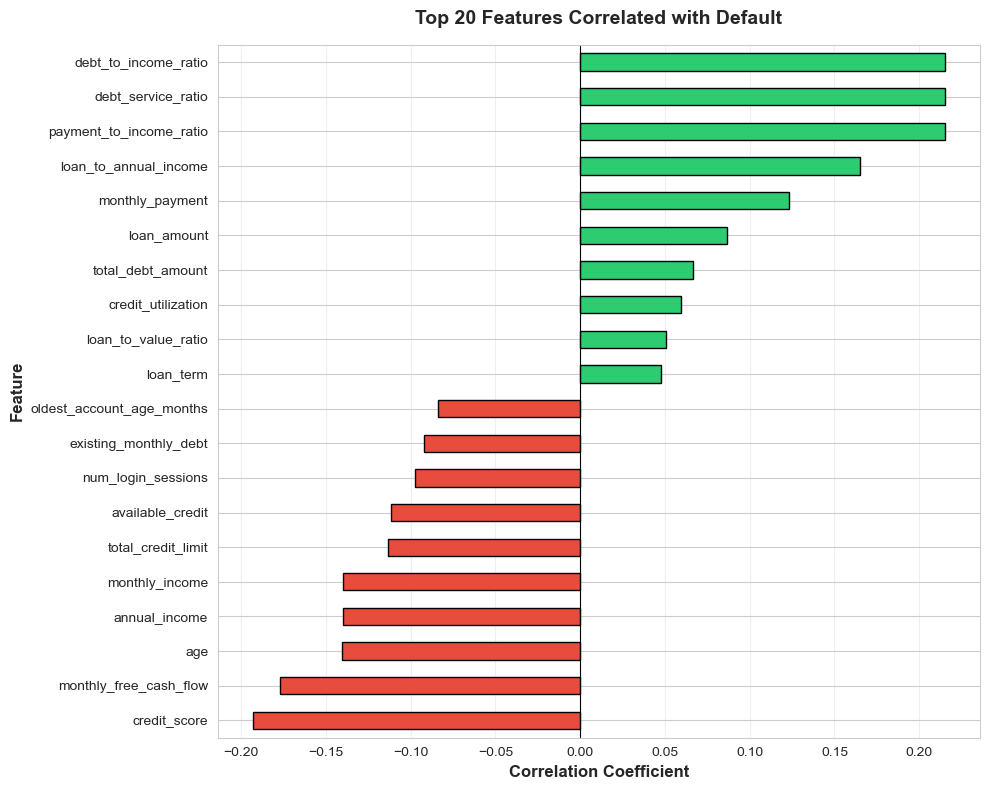

In [58]:
# 4.3. Visualize Top Correlations with Target
fig, ax = plt.subplots(figsize=(10, 8))

# Plot top correlations (both positive and negative)
top_n = 20
top_correlations = pd.concat([
    target_correlations.head(top_n//2),
    target_correlations.tail(top_n//2)
]).sort_values()

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_correlations]
top_correlations.plot(kind='barh', ax=ax, color=colors, edgecolor='black')

ax.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Features Correlated with Default', fontsize=14, fontweight='bold', pad=15)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
# 4.4. Multicollinearity Check
print("Multicollinearity Analysis")
print("="*60)
print("\nChecking for highly correlated feature pairs (|correlation| > 0.8)")
print("-"*60)

# Find pairs of features with high correlation
high_corr_pairs = []
for i in range(len(correlation_features)):
    for j in range(i+1, len(correlation_features)):
        feat1 = correlation_features[i]
        feat2 = correlation_features[j]
        corr_value = correlation_matrix.loc[feat1, feat2]
        
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Feature 1': feat1,
                'Feature 2': feat2,
                'Correlation': corr_value
            })

if len(high_corr_pairs) > 0:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', 
                                                              key=abs, 
                                                              ascending=False)
    print(f"\nFound {len(high_corr_pairs)} highly correlated pairs:")
    print(high_corr_df.to_string(index=False))
    
    print("\n  Consider removing one feature from each pair to reduce multicollinearity")
else:
    print("\n No severe multicollinearity detected (no pairs with |correlation| > 0.8)")

Multicollinearity Analysis

Checking for highly correlated feature pairs (|correlation| > 0.8)
------------------------------------------------------------

Found 31 highly correlated pairs:
                 Feature 1                 Feature 2  Correlation
total_monthly_debt_payment       annual_debt_payment     1.000000
         num_inquiries_6mo      recent_inquiry_count     1.000000
    oldest_credit_line_age oldest_account_age_months     1.000000
      debt_to_income_ratio        debt_service_ratio     1.000000
             annual_income            monthly_income     1.000000
               loan_amount         total_debt_amount     0.973180
      debt_to_income_ratio   payment_to_income_ratio     0.963763
        debt_service_ratio   payment_to_income_ratio     0.963763
       housing_price_index      cost_of_living_index     0.951368
                 loan_term       loan_to_value_ratio     0.949324
   payment_to_income_ratio     loan_to_annual_income     0.925963
               lo

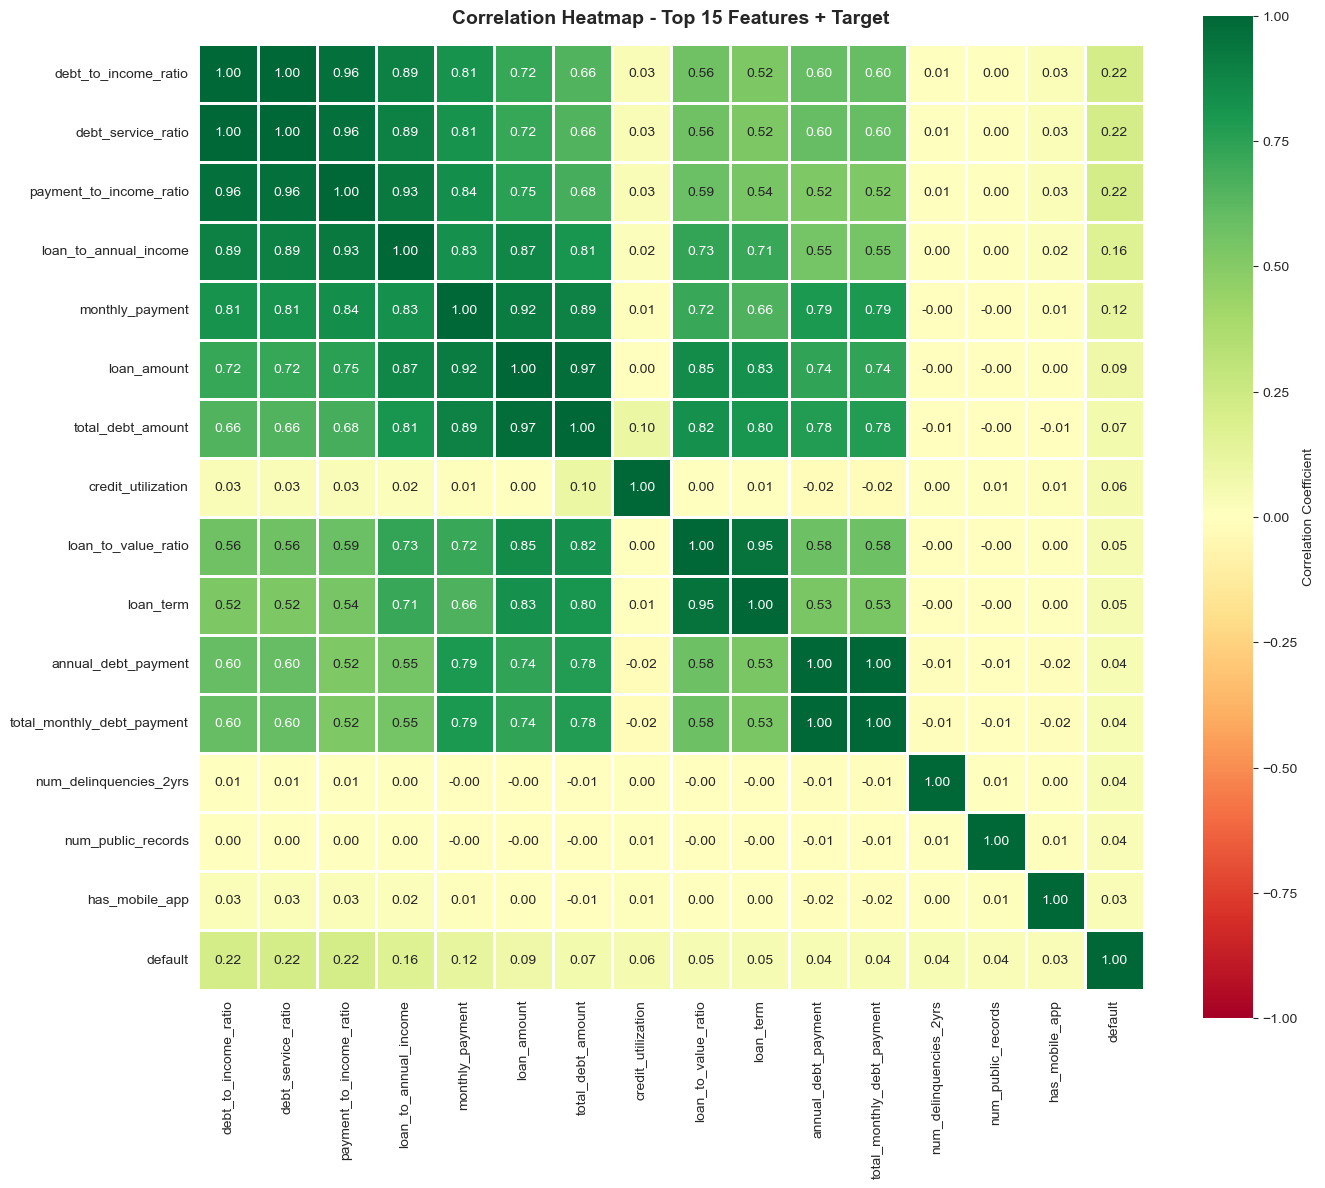

In [60]:
# 4.5. Correlation Heatmap - Top Features
key_features_for_heatmap = target_correlations.head(15).index.tolist() + ['default']

fig, ax = plt.subplots(figsize=(14, 12))

corr_subset = df[key_features_for_heatmap].corr()

sns.heatmap(corr_subset, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Correlation Heatmap - Top 15 Features + Target', 
             fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()